3. Pima Indians Diabetes Dataset

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

Number of times pregnant.
Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
Diastolic blood pressure (mm Hg).
Triceps skinfold thickness (mm).
2-Hour serum insulin (mu U/ml).
Body mass index (weight in kg/(height in m)^2).
Diabetes pedigree function.
Age (years).
Class variable (0 or 1).
The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately 77%.



In [160]:
import csv

rawdata = []
with open("data/pima_indians_diebetes/pima-indians-diabetes.data.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
            rawdata.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Processed 768 lines.


In [161]:
import numpy as np
import matplotlib.pyplot as plt


In [162]:
rawdata = np.array(rawdata)

In [163]:
x_raw = rawdata[:,0:8]
y_raw = rawdata[:,8]
# for row in x_raw:
#     print(row)

In [164]:
x_raw = x_raw.astype(float)
y_raw = y_raw.astype(float)

In [165]:
# for row in x_raw:
#     print(row)
print(x_raw.shape)
print(y_raw.shape)

(768, 8)
(768,)


In [166]:
x_isna = False
y_isna = False
for row in x_raw:
    if(np.isnan(np.min(row)) == True):
        x_isna =True
        
for row in y_raw:
    if(np.isnan(np.min(row)) == True):
        y_isna =True
print(x_isna)
print(y_isna)

False
False


([<matplotlib.axis.YTick at 0x1a1f572e80>,
 <a list of 2 Text yticklabel objects>)

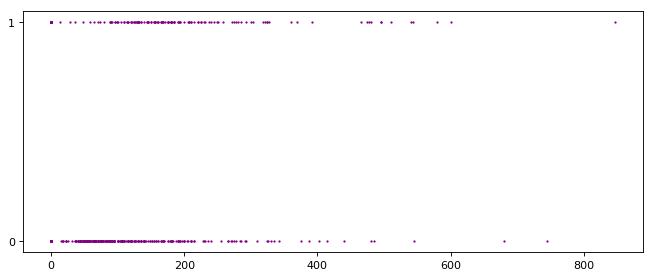

In [167]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# plt.scatter(x_raw[:,0],y_raw,1,c = "blue")
# plt.scatter(x_raw[:,1],y_raw,1,c = "red")
# plt.scatter(x_raw[:,2],y_raw,1,c = "green")
# plt.scatter(x_raw[:,3],y_raw,1,c = "black")
plt.scatter(x_raw[:,4],y_raw,1,c = "purple")
# plt.scatter(x_raw[:,5],y_raw,1,c = "pink")
# plt.scatter(x_raw[:,6],y_raw,1,c = "maroon")
# plt.scatter(x_raw[:,7],y_raw,1,c = "green")
plt.yticks([0,1]) 

In [168]:
np.mean(x_raw[:,4])

79.79947916666667

In [173]:
[abs (x_raw[:,4] - np.mean(x_raw[:,4])) < 1 * np.std(x_raw[:,4])].index(False)


AttributeError: 'builtin_function_or_method' object has no attribute 'all'

In [157]:
x_raw.shape

(768, 8)

([<matplotlib.axis.YTick at 0x1a1f37be10>,
 <a list of 2 Text yticklabel objects>)

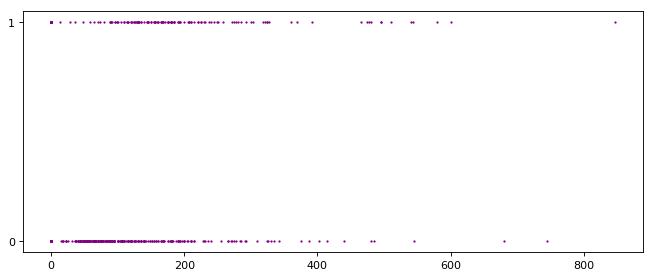

In [140]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# plt.scatter(x_raw[:,0],y_raw,1,c = "blue")
# plt.scatter(x_raw[:,1],y_raw,1,c = "red")
# plt.scatter(x_raw[:,2],y_raw,1,c = "green")
# plt.scatter(x_raw[:,3],y_raw,1,c = "black")
plt.scatter(x_raw[:,4],y_raw,1,c = "purple")
# plt.scatter(x_raw[:,5],y_raw,1,c = "pink")
# plt.scatter(x_raw[:,6],y_raw,1,c = "maroon")
# plt.scatter(x_raw[:,7],y_raw,1,c = "green")
plt.yticks([0,1]) 

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw, test_size=0.3)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
clf1 = LogisticRegression().fit(x_train, y_train)

/Users/j/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
print( clf1.score(x_train, y_train) )
print( clf1.score(x_test, y_test) )

0.7746741154562383
0.7792207792207793


In [112]:
from sklearn.svm import SVC

In [113]:
clf2 = SVC(gamma = 'scale').fit(x_train, y_train)

In [114]:
print( clf2.score(x_train, y_train) )
print( clf2.score(x_test, y_test) )

0.8919925512104283
0.7142857142857143
